# Plot Lightcurves
Here is an example for plotting the cascade lightcurves in two differents energy bands

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.cascade import *
from cascapy.intrinsic import *

### Set the MC simulation file to read

In [3]:
z = 0.4245
B = 1.e-17
file = './data/z042/particles_z0425_B1700_L600.csc'

### Read the MC simulation file and apply first selection
Discard events with a too large time delay and those out of the considered energy bands

In [4]:
emin,emax = 10*MeV,10*TeV
tmin,tmax = 1.,1.e9
ec = EventCatalog(filename=file,emin=emin,emax=emax,tmax=tmax,chatter=2)


Reading: particles.csc...
SIMULATION SETUP:
   redshift      = 0.4245
   nature        = 0
   number        = 100000
   E00min (MeV)  = 1.00e+00
   E00max (TeV)  = 1.00e+02
   Gamma00       = 0.75
   eta_mfp       = 0.01
   Ewth (MeV)    = 1.00e-01
   Eeth (MeV)    = 5.00e+03
   Neth          = 10
   genmax        = 15
   Nthreads      = 10.0
   tmax          = 1.0000e+06
   B             = 1e-17
   lambdaB       = 3.086e+27
   nBseed        = 100
   z             = 0.4245
   npart         = 2.1000e+05
PREPROCESSING OPTIONS:
   OPENMP              
EVENT SELECTION:
   GENERATION: range(0, 10)
   TIME:       0.00e+00 <    DT   (s)  < 1.00e+09
   ENERGY:     1.00e-02 <    E   (GeV) < 1.00e+04
   DIRECTION:  0.00e+00 < thetad (deg) < 1.80e+02
   POSITION:   0.00e+00 < thetap (deg) < 1.80e+02
RESULTS
   Number of numerical particles:  2.10e+05
   gen=0: Fraction=0.4389,                                0.00e+00 < DT <  1.60e+01
   gen=1: Fraction=0.4984,                               -4.80e

### Apply source model and bin data
Here, an isotropic, pulse emission, with a powerlaw spectrum is used.

Two energy bins are defined, one for each energy band. As the two energy bands have a significant width, it is important to use the `flx_type='FE'` mode when binning data. This computes the energy flux in each band instead of the photon flux.

**Warning:** *The following model is **not** normalized. Any realistic prediction should include a proper normalisation.*

In [8]:
# Define source model
emodel = PowerLawSpectralModel(gamma=2.,emin=1*MeV,emax=10*TeV)
tmodel = PulseTimeModel()
amodel = IsotropicAngularModel()
model = SourceModel(emodel=emodel, amodel=amodel, tmodel=tmodel)

# define time bins from edges list
ta,tbins,dt = grid(tmin,tmax,50,log=True)

# define 2 contiguous energy bins from edges list
ebins = [10*MeV,30*GeV,10*TeV]
# define 2 seperated energy bins as a list of (left,right) doublets
#ebins = ([10*MeV,10*GeV],[100*GeV,10*TeV])

# apply model and bin data using the Flux mode 'FE' to get an energy flux instead of a photon flux
bd = BinnedData(ec,ebins=ebins,tbins=tbins,smodel=model,flx_type='FE')


Binning Data
This might take a minute or so...
Done


### Plot the two lightcurves as t*F(t)
Note that in the plot below, the simulation used does not have any photon with time delay > 1e8s (this was a hard setting in the simulation too speed up the calculation). Hence the sharp drop at this time.

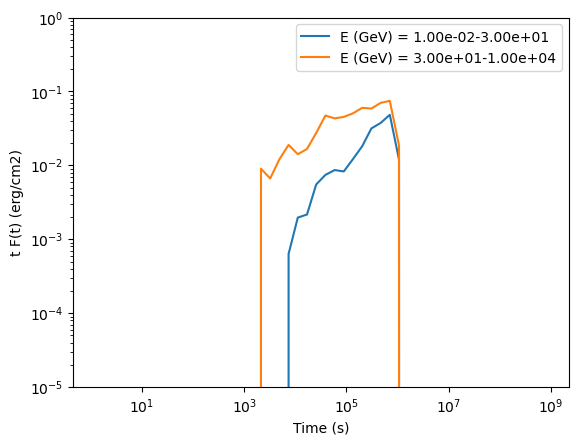

In [9]:
for ie in range(bd.ne):
    
    # multiply by the energy bin width to get the integrated energy in erg/s/cm2
    y = bd.data[:,ie]*(bd.ebins[ie,1]-bd.ebins[ie,0])
    
    # plot
    plt.plot(ta,ta*y,label=f"E (GeV) = {bd.ebins[ie,0]/GeV:.2e}-{bd.ebins[ie,1]/GeV:.2e}")

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5,1e0)
plt.xlabel('Time (s)')
plt.ylabel('t F(t) (erg/cm2)')
plt.legend()
plt.show()